# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

The visualization in question has a few issues. Although the percentages add up to 100%, the bar heights do not correspond to the percentage values. For example, "somewhat" polled at 28% but yet it has no bar visble. The order of categories is unclear, and the chart fails to demonstrate comparisons, contrasts, and differences. Additionally, it violates the second principle of aiming to show causality, mechanism, explanation, and systemic structure. There is also no effort at integration or multivariate representation.

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

The chart being discussed has a few issues. While the color palette is attractive, there are some overlapping/repeated colors that make the visual confusing. The chart distorts the size of the slices, and the title and labels are unclear. It is also unclear what Birth Rates by Sector refers to in this situtation.

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

There are numerous issues with this visualization. Firstly, the y-axis is inverted which means that what appears to be peaks are actually valleys. Secondly, the x-axis does not have equal increments. The time period from the 1990s to 2000s occupies the majority of the chart while the next ten years are compressed, making any changes in the time series data more extreme. This type of graph can be seen as manipulating the scale for desired effect. It distorts the data and makes it difficult to understand what the underlying message is.

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [54]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [55]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [56]:
gss_clean.dropna(subset = ["relationship"], inplace = True)

gss_clean.relationship = gss_clean.relationship.astype('category')
gss_clean.relationship = gss_clean.relationship.cat.reorder_categories(['strongly agree', 'agree', 
                                                                        'disagree', 'strongly disagree'])

bar_plot = gss_clean.relationship.value_counts().sort_index()

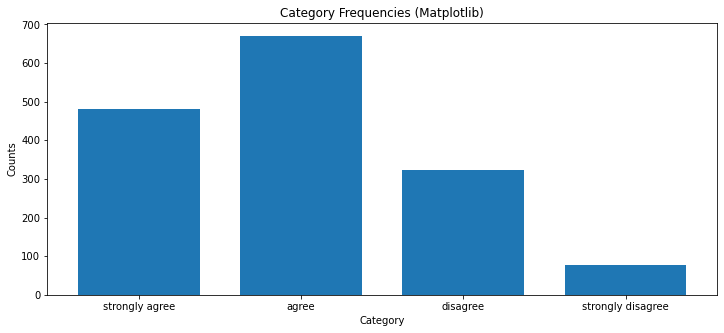

In [57]:
# matplotlib

plt.figure(figsize = (12, 5))
plt.bar(bar_plot.index, bar_plot.values, width = 0.75)

plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title('Category Frequencies (Matplotlib)')

plt.show()

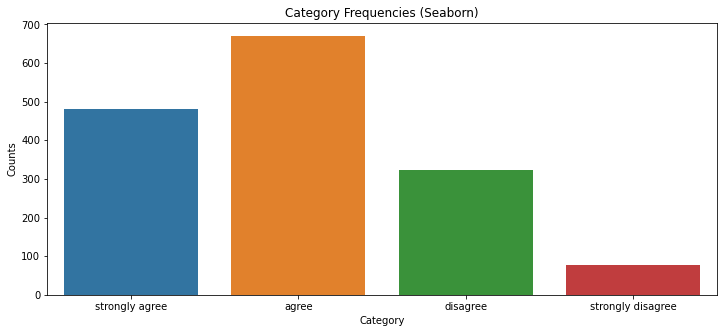

In [58]:
# Seaborn

bar_plot = bar_plot.reset_index()
plt.figure(figsize = (12, 5))
sns.barplot(x = "index", y = "relationship", data = bar_plot)

plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title('Category Frequencies (Seaborn)')
          
plt.show()

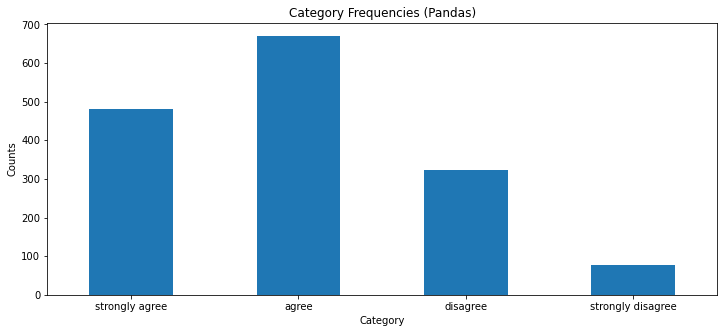

In [59]:
# Pandas

plt.figure(figsize = (12, 5))

gss_clean.relationship.value_counts().sort_index().plot(kind = 'bar', rot = 0)

plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title('Category Frequencies (Pandas)')

plt.show()

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

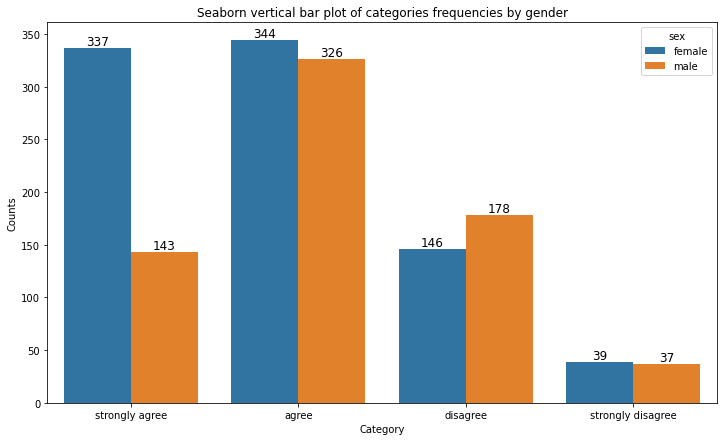

In [60]:
# vertical seaborn

gender = gss_clean.groupby(['sex', 'relationship']).size()
gender = gender.reset_index()
gender = gender.rename({0:'count'}, axis = 1)

# Define plot object
plt.figure(figsize = (12, 7))
myplot = sns.barplot(x = 'relationship', y = 'count', hue = 'sex', data = gender)

plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title('Seaborn vertical bar plot of categories frequencies by gender')

# loop
for rect in myplot.patches:
    x_coord = rect.get_x() + .5*rect.get_width()
    y_coord = rect.get_height()
    plt.text(x_coord, y_coord, str(int(y_coord)), 
             horizontalalignment = 'center', 
             verticalalignment = 'bottom',
             fontsize = 12)

plt.show()

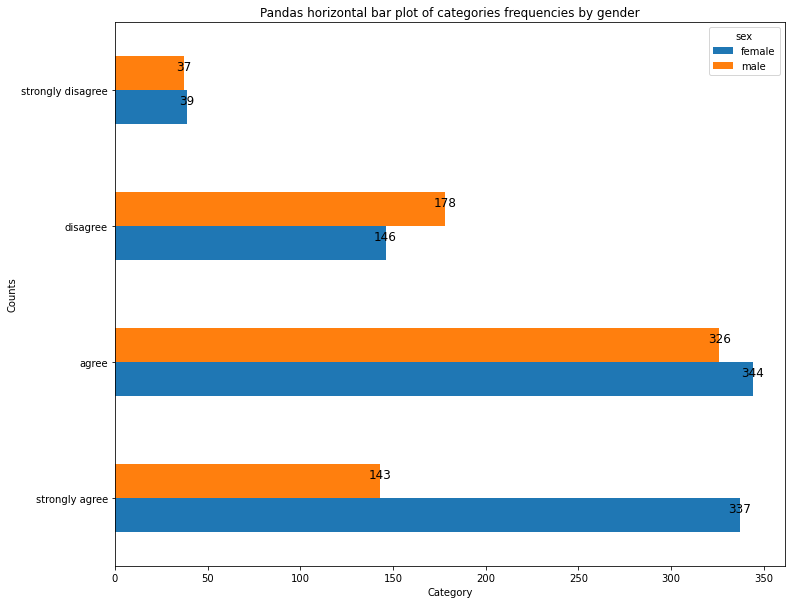

In [61]:
# horizontal

x_tab = pd.crosstab(gss_clean.relationship, gss_clean.sex)

# Define the plot object
myplot = x_tab.plot(kind = 'barh', figsize = [12, 10])

plt.xlabel('Category') 
plt.ylabel('Counts') 
plt.title('Pandas horizontal bar plot of categories frequencies by gender')
    
# loop
for rect in myplot.patches:
    x_coord = rect.get_width()
    y_coord = rect.get_y() + .5*rect.get_height()
    plt.text(x_coord, y_coord, str(int(x_coord)), 
             horizontalalignment = 'center', 
             verticalalignment = 'bottom',
             fontsize = 12)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

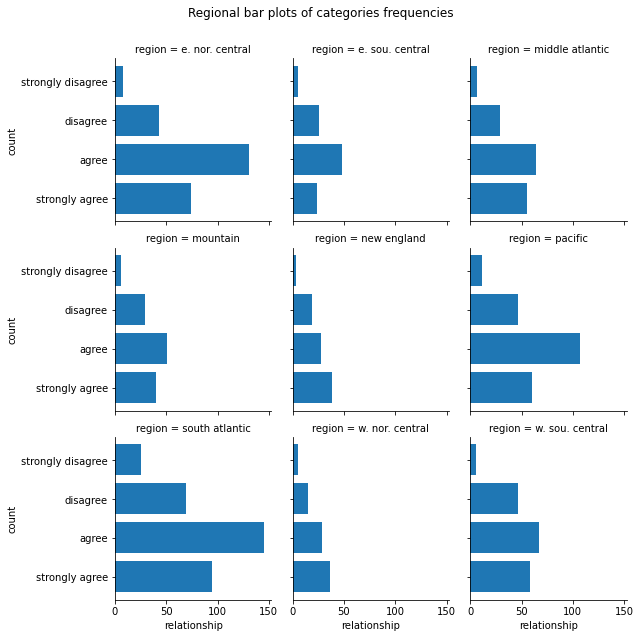

In [62]:
# dataframe

region = gss_clean.groupby(['region', 'relationship']).size().reset_index()
region = region.rename({0:'count'}, axis = 1)

# plots on FacetGrid

plot = sns.FacetGrid(region, col = 'region', col_wrap = 3, height = 3, aspect = 1)
plot.map(plt.barh, 'relationship', 'count')
plot.fig.subplots_adjust(top = .9)
plot.fig.suptitle('Regional bar plots of categories frequencies', fontsize = 12)

plt.show()

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

In [63]:
# dataframe

index = pd.melt(gss_clean.reset_index(),id_vars = 'education', value_vars = ['job_prestige','socioeconomic_index'])

# rename

index.columns = ['Education', 'Index', 'Value' ]
index.Index = index.Index.replace({'job_prestige': 'Occupational Prestige', 
                                   'socioeconomic_index': 'Socioeconomic Status'})

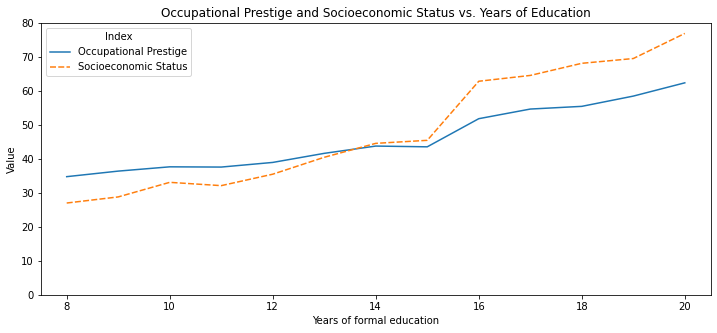

In [64]:
# Seaborn Plot

plt.figure(figsize = (12, 5))
sns.lineplot(x = 'Education', y = 'Value', 
             hue = 'Index', style = 'Index', 
             data = index.query("Education >= 8"), 
             ci = None)

# Labels and titles
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socioeconomic Status vs. Years of Education')
plt.xlim(7.5, 20.5)
plt.ylim(0, 80)

plt.show()

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

In [65]:
# dataframe

economic = gss_clean[['job_prestige', 'mother_job_prestige', 'father_job_prestige',
                          'income', 'socioeconomic_index']].copy()

# drop NAs

economic.dropna(inplace = True)

#float

economic = economic.astype('float')

#correlations

correlations = economic.corr()

Text(0.5, 1.0, 'Correlation Between Personal Economic Indicators')

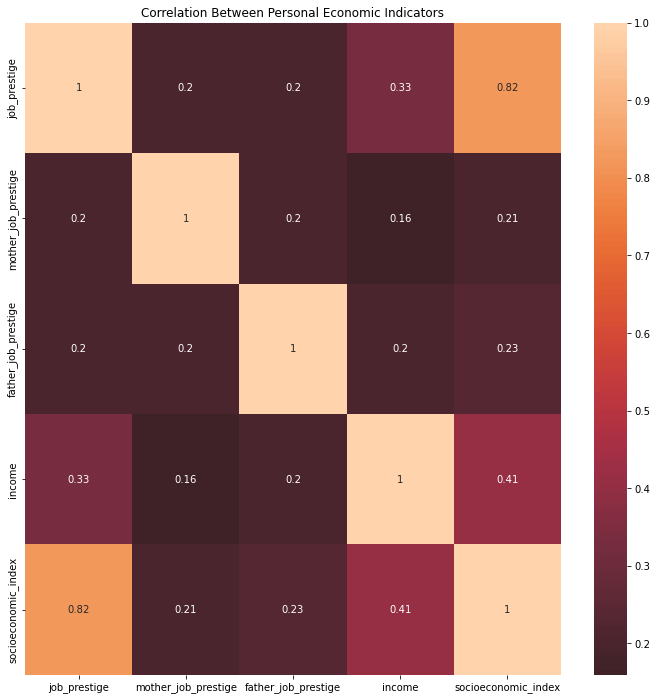

In [66]:
# Heat Map

plt.figure(figsize = (12,12))
sns.heatmap(correlations, center = 0, annot = True)
plt.xticks(rotation = 360)
plt.yticks(rotation = 90)
plt.title("Correlation Between Personal Economic Indicators")

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

In [67]:
# dataframe

education = gss_clean[['education', 'income', 'job_prestige']].reset_index()

# drop NAs

education.dropna(inplace = True)

education['edu_group'] = pd.cut(education['education'],
                                   bins = [-1, 10, 11, 12, 13, 14, 15, 16, 20],
                                   labels = ['10 years or fewer', '11', '12', '13', 
                                             '14', '15', '16', 'More than 16 years'])

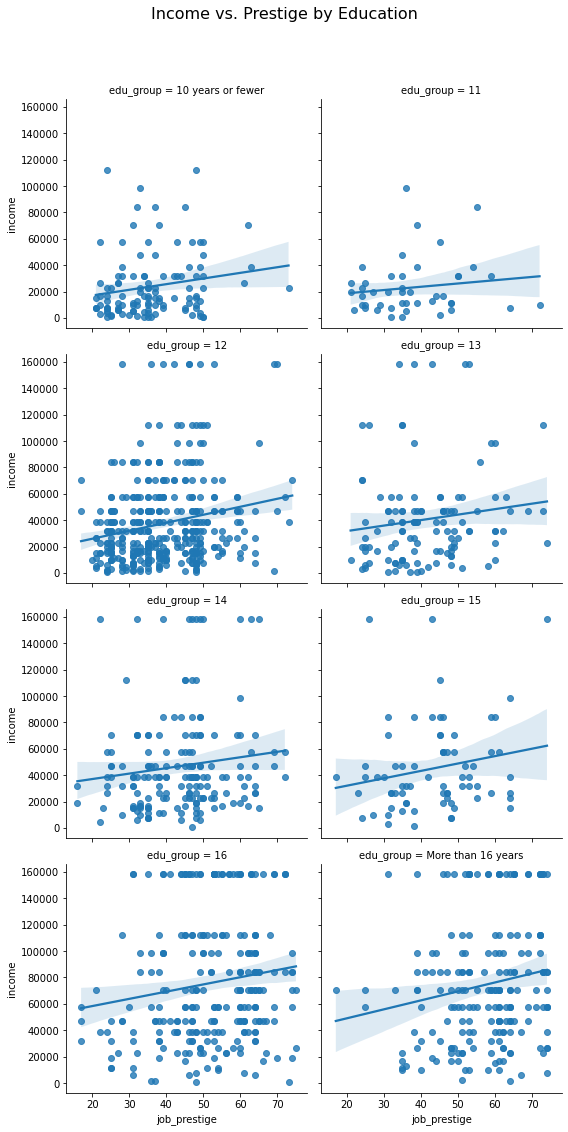

In [75]:
# plot

plot2 = sns.FacetGrid(education, col = 'edu_group', col_wrap = 2, height = 4, aspect = 1)
plot2.map(sns.regplot, 'job_prestige', 'income')
plot2.fig.subplots_adjust(top = .9)
plot2.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
plt.show()

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

In [69]:
# dataframe

equal_pay = gss_clean[['sex', 'income', 'job_prestige']].copy()

# drop NAs

equal_pay.dropna(inplace = True)

In [70]:
# mean income by gender

equal_pay.groupby('sex')['income'].mean()

sex
female    46601.595824
male      54412.051766
Name: income, dtype: float64

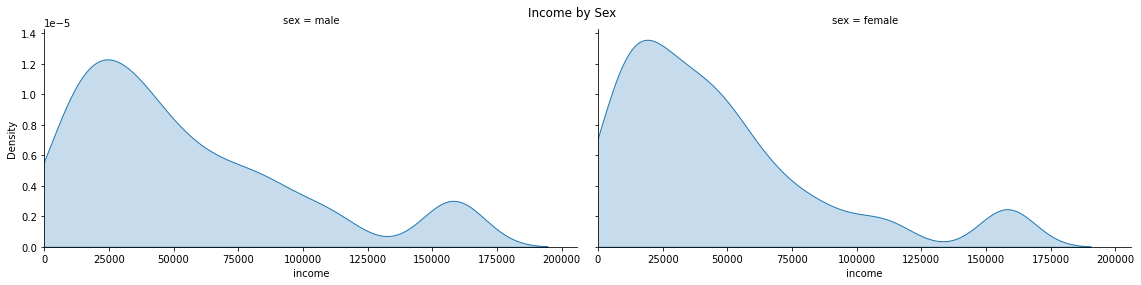

In [71]:
# income by gender

gender_income = sns.FacetGrid(equal_pay, col = 'sex', col_wrap = 2, height = 4, aspect = 2)
gender_income.map(sns.kdeplot, 'income', shade = True, label = 'sex')
gender_income.fig.subplots_adjust(top = .9)
gender_income.fig.suptitle('Income by Sex', fontsize = 12)
plt.xlim(0,)

plt.show()

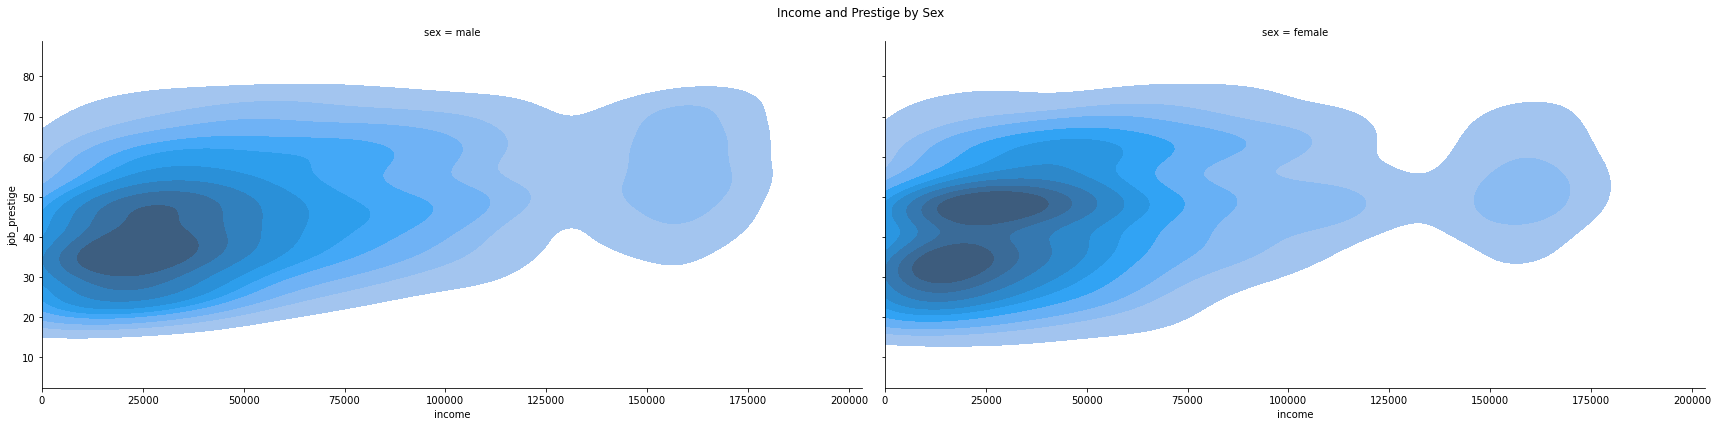

In [78]:
# income by job prestige

gender_prestige = sns.FacetGrid(equal_pay, col = 'sex', col_wrap = 2, height = 6, aspect = 2)
gender_prestige.map(sns.kdeplot, 'income', 'job_prestige', shade = True, label = 'sex')
gender_prestige.fig.subplots_adjust(top = .9)
gender_prestige.fig.suptitle('Income and Prestige by Sex', fontsize = 12)
plt.xlim(0,)

plt.show()

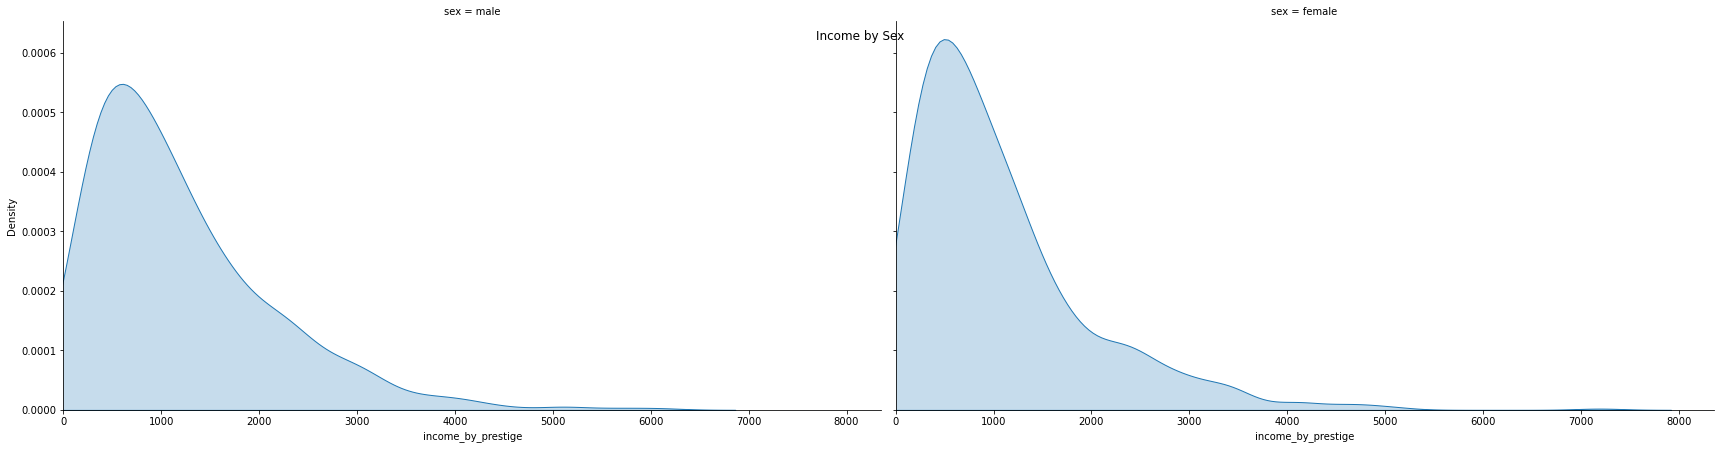

In [79]:
# prestige adjusted income

equal_pay['income_by_prestige'] = equal_pay['income']/equal_pay['job_prestige']

# distribution of incomes

prestige_adjusted = sns.FacetGrid(equal_pay, col = 'sex', col_wrap = 2, height = 6, aspect = 2)
prestige_adjusted.map(sns.kdeplot, 'income_by_prestige', shade = True, label = 'sex')
prestige_adjusted.fig.subplots_adjust(top = 1)
prestige_adjusted.fig.suptitle('Income by Sex', fontsize = 12)
plt.xlim(0,)

plt.show()

Upon analyzing joint distributions, it was discovered that differences in group income means can be attributed not only to gender, but also to job prestige. The KDE plots highlight that dark blue areas signify where the observations are concentrated the most. The right plot depicts that women who earn high incomes also tend to have high prestige jobs, which are indicated by the dark blue area on the y-axis.

Upon adjusting income for job prestige, it was observed that for a unit of prestige, women have somewhat higher peaks and noticeable later rises in the graph between 2000-4000 on the x-axis. This suggests that a significant amount of income is earned by women who hold high prestige jobs, which could help to mitigate inequalities. However, if high prestige jobs were removed, the differences in group income would become even more pronounced.